In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_img(img, title=None):
    plt.imshow(img, cmap="gray")
    if title:
        plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

(512, 512)


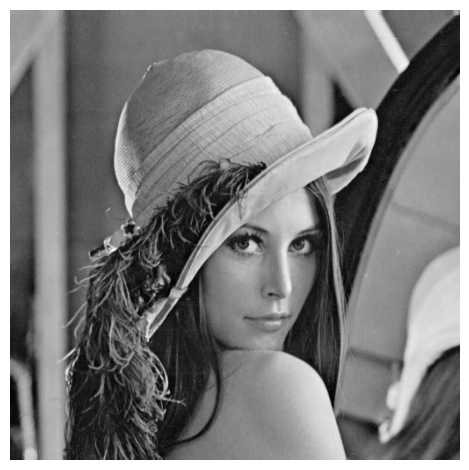

In [3]:
img = cv2.imread("Lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plot_img(img)

# Translation

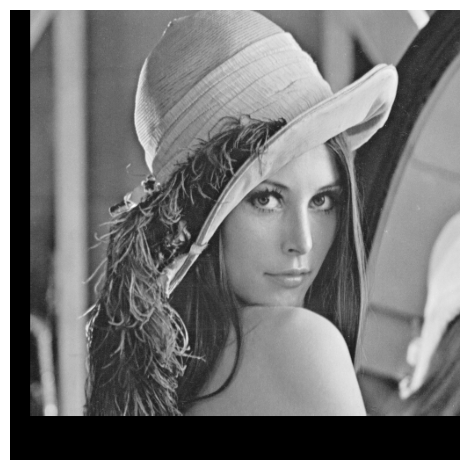

In [4]:
def translation(img, dx, dy):
    T = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    rows, cols = img.shape[0], img.shape[1]
    trans_img = np.zeros_like(img)
    for x1 in range(rows):
        for y1 in range(cols):
            x2, y2, _ = np.dot(T, np.array([x1, y1, 1]))
            if 0 <= x2 < rows and 0 <= y2 < cols:
                trans_img[x2, y2] = img[x1, y1]
    return trans_img

translated_img = translation(img, dx=-50, dy=23)
plot_img(translated_img)

# Scaling

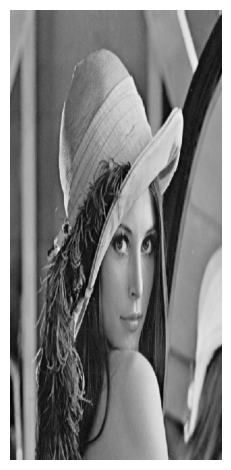

In [5]:
def scaling(img, a, b):
    T = np.array([[a, 0], [0, b]])
    rows, cols = img.shape[0], img.shape[1]
    trans_rows, trans_cols = int(rows*a), int(cols*b)
    trans_img = np.zeros([trans_rows, trans_cols])
    x2, y2 = 0, 0
    prev_x2, prev_y2 = 0, 0
    for x1 in range(rows):
        for y1 in range(cols):
            x2, y2 = map(int, np.dot(T, np.array([x1, y1])))
            trans_img[x2, y2] = img[x1, y1]
            for j in range(prev_y2, y2):
                trans_img[prev_x2, j] = trans_img[prev_x2, prev_y2]
            prev_y2 = y2
        for j in range(prev_y2, trans_cols):
            trans_img[prev_x2, j] = trans_img[prev_x2, prev_y2]
        for i in range(prev_x2, x2):
            for j in range(trans_cols):
                trans_img[i, j] = trans_img[prev_x2, j]
        prev_x2 = x2
    for i in range(prev_x2, trans_rows):
        for j in range(trans_cols):
            trans_img[i, j] = trans_img[prev_x2, j]
    return trans_img


scaled_img = scaling(img, a=1.7, b=0.8)
plot_img(scaled_img)

# Rotation

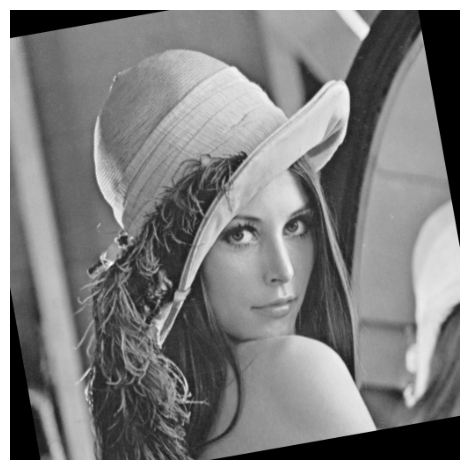

In [6]:
def rotation(img, theta):
    theta = np.deg2rad(theta)
    cx, cy = -img.shape[1] // 2, -img.shape[0] // 2
    T = np.array([
        [np.cos(theta), -np.sin(theta), (1 - np.cos(theta)) * cx - np.sin(theta) * cy],
        [np.sin(theta), np.cos(theta), (1 - np.cos(theta)) * cy + np.sin(theta) * cx]
    ])
    trans_img = cv2.warpAffine(img, T, img.shape[:2])
    return trans_img

rotated_img = rotation(img, -10)
plot_img(rotated_img)

# Shearing

In [7]:
def shearing(img, axis, shear):
    T = np.float64([[1, 0], [0, 1]])
    if axis == 'x':
        T[0, 1] = shear
    elif axis == 'y':
        T[1, 0] = shear
    else:
        raise ValueError("Unknown direction", dir)
    rows, cols = img.shape[0], img.shape[1]
    trans_rows, trans_cols = map(int, np.dot(T, [rows, cols]))
    trans_img = np.zeros([trans_rows, trans_cols])
    for x1 in range(rows):
        for y1 in range(cols):
            x2, y2 = np.dot(T, np.array([x1, y1]))
            if 0 <= x2 < trans_rows and 0 <= y2 < trans_cols:
                trans_img[int(x2), int(y2)] = img[x1, y1]
    return trans_img

## In X-direction

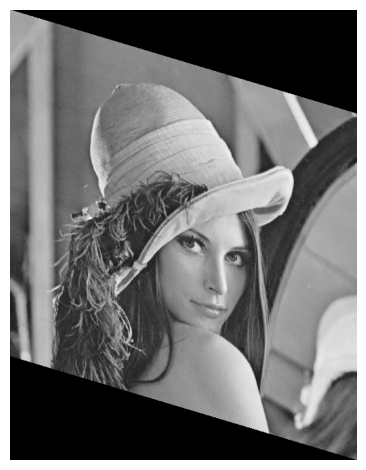

In [8]:
sheared_x_img = shearing(img, "x", shear=0.3)
plot_img(sheared_x_img)

## In Y-direction

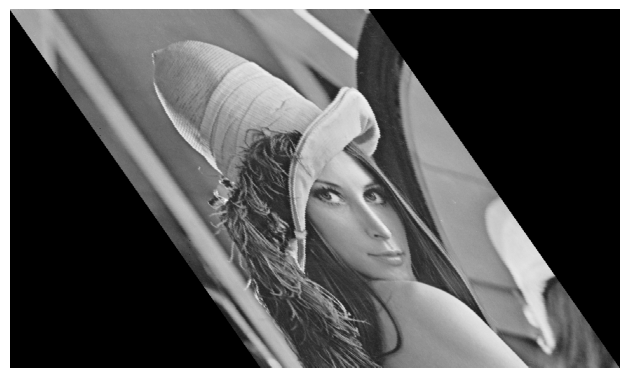

In [9]:
sheared_y_img = shearing(img, "y", shear=0.7)
plot_img(sheared_y_img)